# Ejercicio 2¶

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats

In [2]:
G=nx.read_gml('dolphins.gml')

In [39]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data
data_gender=ldata('dolphinsGender.txt')

data_gender
colores=[]
#le agregamos el atributo "genero" al grafo G
for elemento in data_gender:
    G.node[elemento[0]]['genero']=elemento[1]
    

#creamos un vector de colores que vincula los generos (mismo orden)     
#for gen in nx.get_node_attributes(G, "genero").values():
i=0
for node in G.node:
    gen = G.node[node]['genero']
    #print(node,gen)
    if gen=='f':
        colores.append('red')
    elif gen=='m':
        colores.append('blue')
    else:
        colores.append('grey')



In [50]:
v=0
for node_v in G:      # Loop de nodo v
    genero_v = nx.get_node_attributes(G, "genero").values()[v]
    #print(list(G.node)[v],colores[v])
    #if(genero_v=='NA'):
        #G.remove_node(G.node([node_v][0]))%%!
    v+=1


In [43]:
#list(G.edges)
#print(list(G.edges)[0][0])
#G.node[list(G.edges)[0][0]]['genero']

#(list(G.edges)[2][0],list(G.edges)[2][1])
lista_hetero =[]
lista_homo = []
for i in range(0,len(list(G.edges))):
    if(G.node[list(G.edges)[i][0]]['genero']!='NA' and G.node[list(G.edges)[i][1]]['genero']!='NA'):     
        if G.node[list(G.edges)[i][0]]['genero']==G.node[list(G.edges)[i][1]]['genero']:
            lista_homo +=[(list(G.edges)[i][0],list(G.edges)[i][1])] 
        else:
            lista_hetero+=[(list(G.edges)[i][0],list(G.edges)[i][1])] 
    else:
        pass
#print(lista_homo)   
#print(list(G.edges))
#G.edges[list(G.edges)[10][0], list(G.edges)[10][1]]['labels']
#G.edges(data=True)

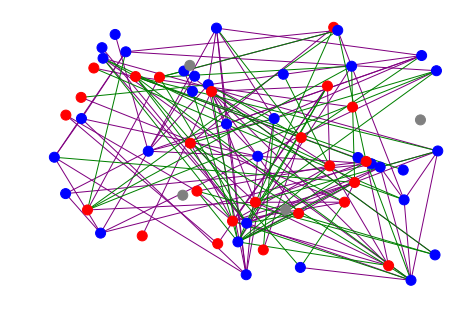

In [49]:
#G=nx.path_graph(4)
pos=nx.random_layout(G)
nx.draw(G, with_labels=False,node_color=colores, font_weight='bold',node_size=100,pos=pos,edge_width=0.1,edge_color='w')
nx.draw_networkx_edges(G,pos,edgelist=lista_homo,width=1,alpha=1,edge_color='purple')
nx.draw_networkx_edges(G,pos,edgelist=lista_hetero,width=1,alpha=1,edge_color='g')
plt.show()

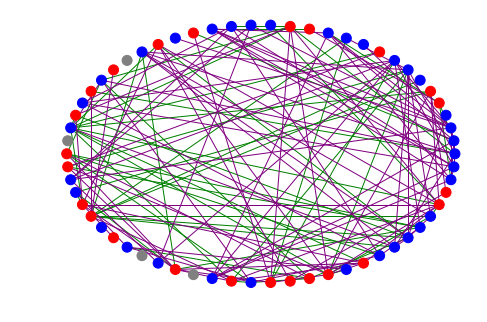

In [48]:
pos=nx.shell_layout(G)
nx.draw(G, with_labels=False,node_color=colores, font_weight='bold',node_size=100,pos=pos,edge_width=0.1,edge_color='w')
nx.draw_networkx_edges(G,pos,edgelist=lista_hetero,width=1,alpha=1,edge_color='g')
nx.draw_networkx_edges(G,pos,edgelist=lista_homo,width=1,alpha=1,edge_color='purple')
plt.show()

In [ ]:
def delta_kronecker(x,y):
    resultado=0
    if x=='NA' or y== 'NA':
        resultado=1
    elif x==y:
        resultado=1
    return resultado
## TAREA: imprimir el grado de los NA

In [ ]:
def enlaces_na(G):
    i=0
    enlaces_NA=0
    for nodo in G:
        if nx.get_node_attributes(G, "genero").values()[i]=='NA':
            enlaces_NA+=list(G.degree)[i][1]
        i+=1
        
    return enlaces_NA        
enlaces_na(G)

In [ ]:
def modularity2(G): ## calcula la fraccion de enlaces entre nodos de distinto genero
	A = nx.adjacency_matrix(G)  # Matriz de adycencia
	m = G.number_of_edges()
	v=0
	sumando = 0.0
	enlaces = 0.0
	union_mh = 0.0
	for node_v in G:      # Loop de nodo v
		genero_v = nx.get_node_attributes(G, "genero").values()[v]
		w=0
		for node_w in G:  # Loop de nodo w
			genero_w = nx.get_node_attributes(G, "genero").values()[w]
			if (A[v,w]):
				if( genero_v!='NA' and  genero_w!='NA'):
					enlaces += 1.0
					if(not (genero_v==genero_w)):
						union_mh+=1.0
			w+=1
		v+=1
	#print("union mh:",union_mh)
	#print("enlaces:",enlaces)
	Q = union_mh/enlaces
	return round(Q,3)

In [ ]:
%%time
modularity_data=modularity2(G)
nodes = nx.get_node_attributes(G, "genero").values()
array_Q = []
iter_max = 200
iteracion=0
G_copy = G.copy()
while iteracion<iter_max:
    random.shuffle(nodes)
    i=0
    for n in G_copy: # cambia el genero de los delfines
        G_copy.node[n]['genero']= nodes[i]
        i+=1
    array_Q +=[modularity2(G_copy)]
    iteracion+=1
print("mean random:",np.mean(array_Q))
print("DATA:",modularity_data)


In [ ]:
def find_nearest(array, value):
    i=0
    while i<len(array)-1:
        if array[i]<=value and array[i+1]>=value:
            distancia1 = abs(array[i]-value)
            distancia2 = abs(array[i+1]-value)
            if distancia1>=distancia2:
                indice = i+1
            else: 
                indice =i
        i+=1
    return indice

In [ ]:
cantidad_bins = 20
bins= np.linspace(min(array_Q),max(array_Q),cantidad_bins)
bin_size = (max(array_Q)-min(array_Q))/cantidad_bins
plt.hist(array_Q,bins=bins,normed=True)
plt.axvline(x=modularity_data,color ='r')
print(np.std(array_Q))

i=0
suma_parcial=0.0
while i<=find_nearest(bins,modularity_data):
    suma_parcial += array_Q[i]*cantidad_bins
    i+=1

i=0
suma_total=0.0
while i<len(array_Q):
    suma_total += array_Q[i]*cantidad_bins
    i+=1  

valor_p = suma_parcial/suma_total    
print(valor_p)

#modularity_data
